# Unit 5 - Financial Planning


In [116]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [117]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [119]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [120]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [121]:
# Fetch current BTC price
# YOUR CODE HERE!

btc_response_data = requests.get(btc_url).json()
btc_price = btc_response_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
# YOUR CODE HERE!]

eth_response_data = requests.get(eth_url).json()
eth_price = eth_response_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
# YOUR CODE HERE!

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13804.90
The current value of your 5.3 ETH is $2001.92


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [122]:
# Current amount of shares
# YOUR CODE HERE!

my_agg = 200
my_spy = 50

In [123]:
# Set Alpaca API key and secret
# YOUR CODE HERE!

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [124]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-10-14", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!

df_portfolio

AGG                                       SPY  \
                            open    high      low   close   volume    open   
2020-10-14 00:00:00-04:00  118.1  118.11  117.985  118.04  3292758  350.75   

                                                             
                             high     low   close    volume  
2020-10-14 00:00:00-04:00  351.93  347.14  347.97  47156216

In [125]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.04
Current SPY closing price: $347.97


In [126]:
# Compute the current value of shares
# YOUR CODE HERE!

my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17398.50
The current value of your 200 AGG shares is $23608.00


### Savings Health Analysis

In [127]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

value_data = {
    "amount":[crypto, shares]
}

df_savings = pd.DataFrame(value_data, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,15806.812
shares,41006.500


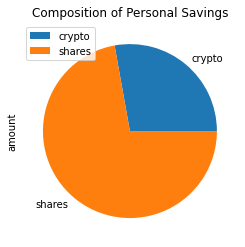

In [131]:
# Plot savings pie chart
# YOUR CODE HERE!

df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [139]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

ttl_savings = crypto + shares

# Validate saving health
# YOUR CODE HERE!
if ttl_savings >= emergency_fund:
     print(f"Congratulations! You have enough money in your emergency fund.")
else:
    print(f"You do not have sufficient emergency funds.")
    

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [145]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-14', tz='America/New_York').isoformat()

In [152]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562   

                              SPY                                      
                             open    high       low   close    volume  
2015-10-14 00:00:00-04:00  200.18  200.87  198.9400  199.27  82856686  
2015-10-15 00:00:00-04:00  200.08  202.34  199.6400  202.33  96008389  
2015-10-16 00:00:00-04:00  202.83  203.29  201.9200  203.14  79323870  
2015-10-19 00:00:00-04:00  202.50  203.37  202.1300  203.33  61255929  
2015-10-20 00:00:00-04:00  202.85  203.84  202.5471  203.07  60081395

In [154]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_thirtyyear = MCSimulation(
            portfolio_data = df_stock_data,
            weights=[.4,.6],
            num_simulation = 500,
            num_trading_days = 252*30
)

In [155]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-14 00:00:00-04:00          NaN  200.18  200.87  198.9400  199.27   
2015-10-15 00:00:00-04:00    -0.001272  200.08  202.34  199.6400  202.33   
2015-10-16 00:00:00-04:00    -0.001001  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   

                                                  
                             volume daily_return  
2015-10-14 00:00:00-04:00  82856686          NaN  
2015-10-15 00:00:00-04:00  96008389     0.015356  
2015-10-16 00:00:00-04:00  79323870     0.004003  
2015-10-19 00:00:00-04:00  61255929     0.000935  
2015-10-20 00:00:00-04:00  60081395    -0.001279

In [156]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000970,0.992296,0.996377,0.993487,0.999275,1.002429,0.991775,1.003379,1.003933,1.001838,...,1.003363,0.996729,0.997825,0.998034,0.989867,0.994024,0.991193,0.992817,1.001240,0.998068
2,0.998973,1.001788,0.988297,1.003500,1.006557,1.002649,0.992690,1.000707,0.992603,1.007202,...,0.998417,0.992390,0.988556,0.991402,0.999016,0.994576,1.007880,0.985478,1.001620,1.009134
3,0.988141,1.002174,0.993820,0.995566,1.010364,0.991206,1.000647,1.014029,0.992377,0.993702,...,0.996297,0.992074,0.985884,1.001477,0.988149,1.004479,1.014831,0.976997,0.997738,1.010987
4,0.983178,0.997197,1.001735,0.981674,1.011466,0.999528,1.016776,1.020785,0.987088,0.986385,...,0.998329,1.004990,0.998986,1.010529,0.987059,0.996956,1.004724,0.992151,1.000396,1.002542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.216315,5.276639,7.390108,2.961852,9.637591,5.772089,14.167919,22.153409,7.329678,6.012115,...,9.351966,1.403946,27.102877,3.438008,23.432702,22.092714,4.913630,16.353852,5.146668,18.915681
7557,7.227523,5.238781,7.460992,2.945768,9.537860,5.731800,14.333365,21.947452,7.284891,6.010868,...,9.336943,1.408498,27.257055,3.446730,23.447688,22.145246,4.967956,16.263508,5.150700,18.881474
7558,7.273148,5.261749,7.535973,2.931351,9.614970,5.752543,14.299268,22.181425,7.380682,6.032661,...,9.327314,1.407357,27.466572,3.473577,23.302885,22.479237,5.006365,16.263330,5.140639,19.157327
7559,7.290810,5.282397,7.618089,2.949182,9.697843,5.786805,14.127730,22.226966,7.405764,5.963810,...,9.299961,1.395508,27.465992,3.432451,23.453372,22.446768,4.963195,16.011050,5.170030,18.980083


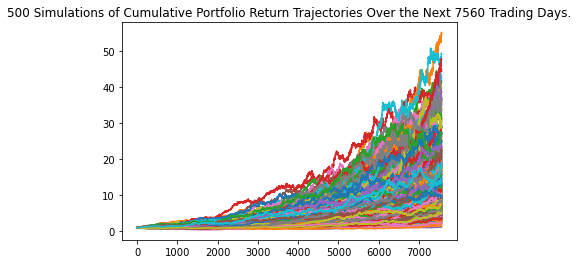

In [157]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirtyyear.plot_simulation()

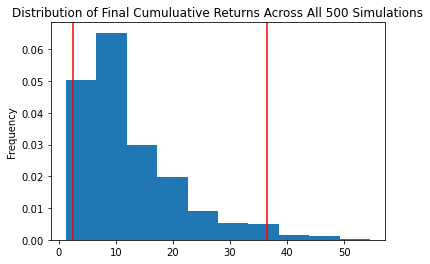

In [158]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [159]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirtyyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             12.396161
std               8.722658
min               1.198784
25%               6.308748
50%               9.860254
75%              15.655222
max              54.548096
95% CI Lower      2.527474
95% CI Upper     36.442127
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [162]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $50549.49 and $728842.54


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [163]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $75824.23 and $1093263.81


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [193]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_fiveyear = MCSimulation(
            portfolio_data = df_stock_data,
            weights=[.2,.8],
            num_simulation = 500,
            num_trading_days = 252*5
)

In [194]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.020342,1.014426,1.010864,1.002766,1.001204,0.999540,1.007413,0.990970,1.003660,1.002860,...,1.012798,0.997014,0.998254,0.999628,0.990443,0.986530,0.997616,1.015215,0.999799,0.989226
2,1.026333,1.004840,1.014025,1.007046,0.991521,0.982277,1.002101,1.003606,1.002427,1.008401,...,1.007260,0.987533,0.985893,1.003411,0.985132,0.984694,0.993911,1.007167,1.012805,1.003226
3,1.025325,0.999714,1.028947,1.020183,0.974577,0.984250,0.977453,0.981773,1.009246,1.016968,...,1.010197,0.997633,0.974987,1.018528,0.973483,0.990367,1.004304,1.011008,1.021109,1.006415
4,1.012718,0.997495,1.033041,1.034639,0.954776,1.007392,0.971477,0.983527,1.005713,1.030821,...,1.004342,1.009843,0.983508,0.998438,0.978674,0.981468,1.003168,1.023627,1.010963,0.995916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.623497,2.246795,1.557438,2.185407,1.712437,2.078905,1.993273,1.455471,2.070323,1.960543,...,1.213508,1.358087,1.577239,1.113976,1.713178,2.116819,2.482055,0.901321,2.526006,0.974439
1257,1.654736,2.272880,1.558328,2.189585,1.683656,2.100141,1.958629,1.465589,2.071525,1.947189,...,1.223953,1.332612,1.578234,1.127685,1.702012,2.127531,2.469997,0.891339,2.535141,0.977214
1258,1.657075,2.273825,1.570480,2.185899,1.666344,2.097533,1.955604,1.467077,2.092178,1.924705,...,1.218743,1.341384,1.576299,1.121260,1.681719,2.124727,2.437794,0.883021,2.557771,0.980801
1259,1.654535,2.299832,1.590920,2.160005,1.639758,2.088411,1.979228,1.467016,2.110272,1.961684,...,1.209517,1.329553,1.602655,1.100310,1.697072,2.126426,2.436841,0.868516,2.523963,0.993390


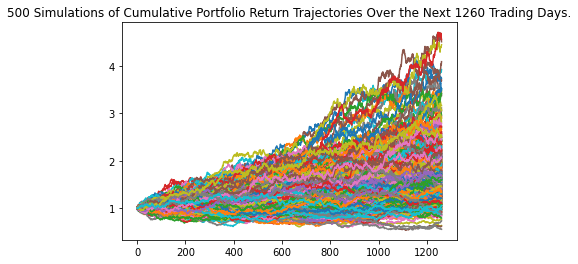

In [195]:
# Plot simulation outcomes
# YOUR CODE HERE!
five_yr_line_plot = MC_fiveyear.plot_simulation()

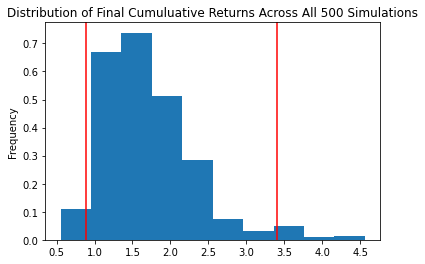

In [196]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

five_yr_dist_plot = MC_fiveyear.plot_distribution()

In [197]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

five_yr_tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(five_yr_tbl)

count           500.000000
mean              1.712938
std               0.609559
min               0.552104
25%               1.285679
50%               1.614828
75%               2.035901
max               4.561811
95% CI Lower      0.886049
95% CI Upper      3.410345
Name: 1260, dtype: float64


In [203]:
###### Set initial investment
# YOUR CODE HERE!

initial_investment = 350000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_five = round(five_yr_tbl[8]*350000,2)
ci_upper_five = round(five_yr_tbl[9]*350000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $350000 in the portfolio over the next 5 years will end within in the range of $310117.17 and $1193620.78


### Ten Years Retirement Option

In [173]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_tenyear = MCSimulation(
            portfolio_data = df_stock_data,
            weights=[.4,.6],
            num_simulation = 500,
            num_trading_days = 252*10
)


In [174]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992364,1.000006,0.998926,1.002750,0.994648,1.009154,1.004243,1.004895,1.007189,0.994762,...,1.001027,1.011271,0.998234,1.001222,1.002398,1.007584,1.002114,0.988835,1.004747,0.996915
2,0.986496,1.000361,0.990452,1.000181,0.987851,1.006515,0.989362,1.002158,1.017331,1.005713,...,0.987764,1.005654,0.996639,0.998863,1.011855,1.008797,1.000615,0.991018,1.003094,0.998125
3,0.990474,1.006801,0.986480,0.991431,0.993870,1.024315,0.992158,1.000785,1.005772,1.008704,...,0.996890,1.018913,1.006050,0.985723,1.017835,0.995974,1.001853,0.994107,1.005829,0.987667
4,0.996937,1.013798,0.984910,0.996530,0.981030,1.004709,0.991223,0.994106,1.006583,1.014362,...,0.998140,1.025543,1.015317,0.993527,1.017261,0.987252,1.003501,1.010583,1.002119,0.983450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.901440,1.609938,2.353299,1.449997,1.526037,1.846247,3.367823,1.798784,2.914680,2.005817,...,1.829603,1.883565,2.061111,1.699213,3.060850,1.093832,2.269444,2.124989,2.689398,2.123426
2517,1.881081,1.630847,2.384579,1.452384,1.522355,1.850007,3.367504,1.811438,2.910554,1.978648,...,1.854706,1.865745,2.029013,1.709190,3.034119,1.101367,2.299691,2.130549,2.677860,2.131329
2518,1.888162,1.633184,2.394380,1.453201,1.498208,1.837172,3.358184,1.823021,2.931788,1.981878,...,1.849821,1.858426,2.035165,1.698285,3.041890,1.095528,2.253509,2.141773,2.685279,2.162768
2519,1.920249,1.632423,2.397702,1.457424,1.486028,1.827502,3.354590,1.812361,2.935148,2.010741,...,1.845007,1.870530,2.035698,1.692074,3.055167,1.099604,2.258432,2.126774,2.687378,2.168751


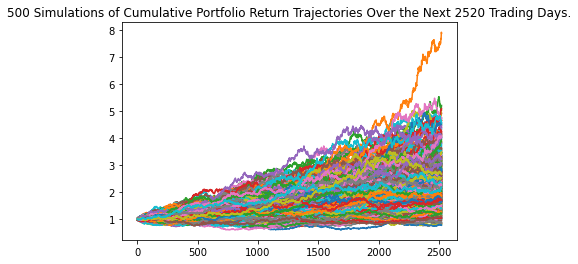

In [175]:
# Plot simulation outcomes
# YOUR CODE HERE!
ten_yr_line_plot = MC_tenyear.plot_simulation()

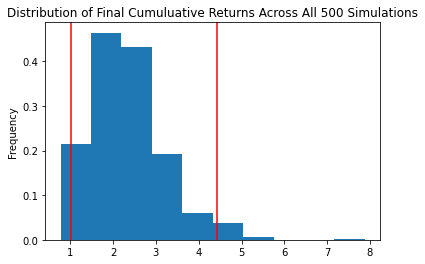

In [176]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
ten_yr_dist_plot = MC_tenyear.plot_distribution()

In [177]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

ten_yr_tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

print(ten_yr_tbl)

count           500.000000
mean              2.327691
std               0.873853
min               0.772072
25%               1.698125
50%               2.233142
75%               2.771954
max               7.881743
95% CI Lower      1.028397
95% CI Upper      4.438363
Name: 2520, dtype: float64


In [200]:
# Set initial investment
# YOUR CODE HERE!

initial_investment = 300000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_ten = round(ten_yr_tbl[8]*300000,2)
ci_upper_ten = round(ten_yr_tbl[9]*300000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $300000 in the portfolio over the next 10 years will end within in the range of $308518.95 and $1331508.98
